In [2]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats
pd.options.display.max_columns = None

## Various Correlations
#### box office with audience & critic percentages

In [32]:
wikidata = pd.read_json('movies/data/wikidata-movies2.json.gz', orient='records', lines=True)
tomato = pd.read_json('movies/data/rotten-tomatoes.json.gz', orient='records', lines=True)
r = pd.read_json('movies/data/omdb-data.json.gz', orient='records', lines=True)

In [33]:
wiki_tomato = wikidata.merge(tomato, on='imdb_id', how="inner")

In [34]:
wiki_tomato = wiki_tomato[pd.notnull(wiki_tomato['made_profit'])]
wiki_tomato = wiki_tomato[pd.notnull(wiki_tomato['audience_ratings'])]
#wiki_tomato = wiki_tomato[pd.notnull(wiki_tomato['critic_percent'])]
#wiki_tomato = wiki_tomato[pd.notnull(wiki_tomato['audience_percent'])]
wiki_tomato['profit'] = wiki_tomato['nbox'] - wiki_tomato['ncost']

In [35]:
def millions(x, pos):
    if x >= 1000000000:
        return '%1.1fB' % (x * 1e-9)
    else:
        return '%1.1fM' % (x * 1e-6)

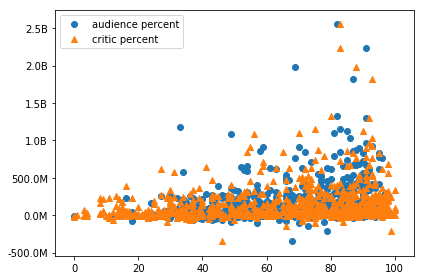

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
y_labels = ax.get_yticks()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions))
ax.scatter(wiki_tomato['audience_percent'], wiki_tomato['profit'], marker='o', label='audience percent')
ax.scatter(wiki_tomato['critic_percent'], wiki_tomato['profit'], marker='^', label='critic percent')
plt.legend(loc='upper left')
plt.tight_layout()

In [37]:
wiki_tomato['audience_percent'].corr(wiki_tomato['nbox'])
# 0.17 correlation - fairly weak

0.19265170852700514

In [38]:
wiki_tomato['critic_percent'].corr(wiki_tomato['nbox'])

0.15423675242457477

#### Cast Member to Box office

In [39]:
wiki_tomato.sort_values(by='audience_ratings', ascending=False)

,based_on,cast_member,country_of_origin,director,enwiki_title,filming_location,genre,imdb_id,label,made_profit,main_subject,metacritic_id,nbox,ncost,original_language,publication_date,rotten_tomatoes_id_x,series,wikidata_id,audience_average,audience_percent,audience_ratings,critic_average,critic_percent,rotten_tomatoes_id_y,profit
26909,NaN,"[Q38111, Q202765, Q205435, Q544465, Q35011, Q3...",Q30,[Q42574],Titanic (1997 film),"[Q62, Q16739, Q24639, Q96, Q1952]","[Q846544, Q130232, Q1054574, Q21401869]",tt0120338,Titanic,1.0,"[Q25173, Q211606]",movie/titanic,2.186772e+09,200000000.0,Q1860,1997-11-01,m/titanic,NaN,Q44578,3.3,69.0,35796812.0,8.0,88.0,m/titanic,1.986772e+09
21252,Q332581,"[Q483771, Q170510, Q206922, Q171363, Q168763, ...",Q664,[Q4465],The Lord of the Rings: The Return of the King,[Q664],"[Q157394, Q130232, Q188473, Q52162262]",tt0167260,The Lord of the Rings: The Return of the King,1.0,NaN,movie/the-lord-of-the-rings-the-return-of-the-...,1.119929e+09,94000000.0,Q1860,2003-12-01,m/the_lord_of_the_rings_the_return_of_the_king,Q26214973,Q131074,3.7,86.0,34678797.0,8.7,93.0,m/the_lord_of_the_rings_the_return_of_the_king,1.025929e+09
21794,NaN,NaN,Q30,"[Q432845, Q269497, Q521501]",Shrek 2,NaN,"[Q188473, Q157394]",tt0298148,Shrek 2,1.0,"[Q146, Q1249918]",movie/shrek-2,9.198388e+08,150000000.0,Q1860,2004-05-15,m/shrek_2,Q26196748,Q485983,3.5,69.0,34232224.0,7.7,88.0,m/shrek_2,7.698388e+08
10301,Q309048,"[Q132616, Q483907, Q104514, Q57614, Q318134, Q...",Q30,[Q4465],King Kong (2005 film),"[Q60, Q664]",[Q319221],tt0360717,King Kong,1.0,NaN,movie/king-kong,5.505174e+08,207000000.0,Q1860,2005-12-14,m/king_kong,NaN,Q160215,2.8,50.0,33766555.0,7.7,84.0,m/king_kong,3.435174e+08
21205,NaN,"[Q193048, Q206890, Q296883, Q42204, Q43416, Q4...",Q30,"[Q9544977, Q9545711]",The Matrix,"[Q62, Q3130, Q408]","[Q20656232, Q2484376, Q20443008, Q174526, Q399...",tt0133093,The Matrix,1.0,"[Q2798820, Q544830, Q11660]",movie/the-matrix,4.635174e+08,63000000.0,Q1860,1999-03-31,m/matrix,Q1210827,Q83495,3.6,85.0,33323365.0,7.6,87.0,m/matrix,4.005174e+08
27141,NaN,"[Q48337, Q32522, Q447669, Q40504, Q216221, Q23...",Q30,[Q722135],Bruce Almighty,[Q16552],"[Q157443, Q859369, Q1054574, Q157394]",tt0315327,Bruce Almighty,1.0,NaN,movie/bruce-almighty,4.845728e+08,81000000.0,Q1860,2003-05-23,m/bruce_almighty,NaN,Q207816,3.3,57.0,33024043.0,5.7,49.0,m/bruce_almighty,4.035728e+08
27167,NaN,"[Q4491, Q235141, Q228882, Q4293, Q712647, Q185...",Q30,[Q323201],Scary Movie,[Q24639],"[Q1146335, Q224700, Q200092]",tt0175142,Scary Movie,1.0,NaN,movie/scary-movie,2.780198e+08,19000000.0,Q1860,2000-07-07,m/scary_movie,Q82269,Q219424,3.0,43.0,32581878.0,5.5,53.0,m/scary_movie,2.590198e+08
16369,NaN,"[Q125017, Q188375, Q220396, Q207596, Q187038, ...",Q17,[Q3772],Kill Bill: Volume 1,"[Q65, Q96, Q8646, Q17, Q956]","[Q3990883, Q1776156, Q15858553, Q2642760, Q169...",tt0266697,Kill Bill Volume 1,1.0,[Q1712140],movie/kill-bill-vol-1,1.809490e+08,30000000.0,Q1860,2003-01-01,m/kill_bill_vol_1,Q223132,Q165325,3.4,81.0,32557476.0,7.7,85.0,m/kill_bill_vol_1,1.509490e+08
21514,NaN,"[Q313470, Q1058672, Q234487, Q231438, Q231739,...",Q30,[Q518770],Saw II,[Q172],[Q200092],tt0432348,Saw II,1.0,NaN,movie/saw-ii,1.477000e+08,4000000.0,Q1860,2005-01-01,m/saw_ii,NaN,Q270410,3.2,59.0,32524605.0,4.6,37.0,m/saw_ii,1.437000e+08
16471,Q466605,"[Q37175, Q296887, Q470746, Q170428, Q563177, Q...",Q30,[Q56008],Charlie and the Chocolate Factory (film),NaN,"[Q2143665, Q157394, Q157443, Q52162262, Q842256]",tt0367594,Charlie and the Chocolate Factory,1.0,NaN,movie/charlie-and-the-chocolate-factory,4.750000e+08,150000000.0,Q1860,2005-07-10,m/charlie_and_the_chocolate_factory,NaN,Q218235,3.0,51.0,32495264.0,7.2,82.0,m/charlie_and_the_chocolate_factory,3.250000e+08


In [40]:
#### Correlate nbox with number of audience_ratings

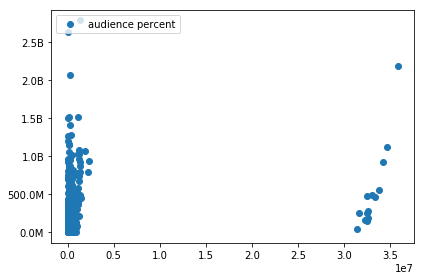

In [41]:
fig2 = plt.figure()
ax = fig2.add_subplot(111)
y_labels = ax.get_yticks()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions))
ax.scatter(wiki_tomato['audience_ratings'], wiki_tomato['nbox'], marker='o', label='audience percent')
plt.legend(loc='upper left')
plt.tight_layout()

In [43]:
wiki_tomato['audience_ratings'].corr(wiki_tomato['nbox'])

0.18314910075255011